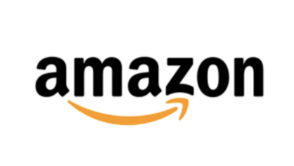

# **Impact of Discounts on Amazon Sales & Customer Analysis**

## **Background**
Amazon is one of the largest e-commerce platforms, offering a wide range of products with frequent discounts and promotions. However, despite providing significant discounts across various categories, data suggests that **higher discounts do not always result in better customer satisfaction**. Some products with bigger discounts still receive **lower ratings**, which raises important questions about:
- **Customer perception** of discounted products  
- **Product quality concerns** at higher discount rates  
- **Purchasing behavior** and its relationship with discount strategies  

Additionally, Amazon wants to **optimize its discount strategies** for high-ticket items (expensive products) to ensure that customers are satisfied with their purchases. The company also needs insights into:
- **Which product categories benefit the most from discounts**  
- **How customer feedback can improve overall sales and shopping experiences**  

This analysis will help Amazon make **data-driven decisions** to enhance customer satisfaction and maximize revenue.


## 1. Importing data

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import sent_tokenize
from collections import Counter


In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Creating dataset
amazon = pd.read_csv("/content/drive/MyDrive/Data analysis-Oliver Vu/Database/amazon.csv")
amazon.info()
amazon.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

In [4]:
pd.set_option('display.max_colwidth', None)
amazon

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1W

## 2. Data preparation

**Steps to consider: **
- Data cleaning (missing values, outliers)
- Data check (data type, inconsistency)
- Data Transformation (create necessary columns for futher analysis)

In [5]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
#Checking for N/A values
amazon.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [7]:
# Converting data type

amazon['discounted_price'] = amazon['discounted_price'].str.replace('₹', '', regex=False)
amazon['discounted_price'] = amazon['discounted_price'].str.replace(',', '', regex=False).astype(float)

amazon['actual_price'] = amazon['actual_price'].str.replace('₹', '', regex=False)
amazon['actual_price'] = amazon['actual_price'].str.replace(',', '', regex=False).astype(float)

amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%', '', regex=False).astype(float)

amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')

amazon['rating_count'] = amazon['rating_count'].str.replace(',', '', regex=False).astype(float)
amazon['rating_count'] = pd.to_numeric(amazon['rating_count'], errors='coerce')

amazon.dropna(subset = ['rating','rating_count'], inplace=True)


In [8]:
#Create new columns
def main_category(category):
  return category.split('|')[0].strip()

def sub_category(category):
  return category.split('|')[-1].strip()


amazon['main_category']= amazon['category'].apply(main_category)
amazon['sub_category']= amazon['category'].apply(sub_category)

amazon['main_category'] =amazon['main_category'].replace(['MusicalInstruments', 'HomeImprovement','Toys&Games','Car&Motorbike','Health&PersonalCare'], 'Others')

amazon['main_category'].value_counts()

,count
main_category,
Electronics,526
Computers&Accessories,451
Home&Kitchen,447
OfficeProducts,31
Others,7


In [9]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

## 3. Data analysis

## **Key Aspects to Consider:**
* Overall Discount Trends: Evaluate the average discount percentage across all products.
* Correlation Between Ratings and Discounts: Analyze how product ratings change with varying discount levels.
* Discount Distribution by Category: Examine how discounts are distributed across different product categories.
* High-Value Products After Discounts: Identify the most expensive items based on their final prices after discounts.
* Customer Satisfaction Analysis: Assess overall customer ratings and satisfaction levels in relation to discounts.

And other relevant factors that may impact sales, customer perception, and purchasing behavior.

You are encouraged to further the analysis as much as you can)

## **Note**
*A sample dashboard is provided for reference, but you are encouraged to develop your own approach based on the available data and insights you uncover!*  


##3.1: Basic statistics and distributions

In [10]:
amazon.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,47.672367,4.096717,18307.376881
std,6950.548042,10884.467444,21.613905,0.289497,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1191.500000
50%,799.000000,1670.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4321.250000,63.000000,4.300000,17342.250000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


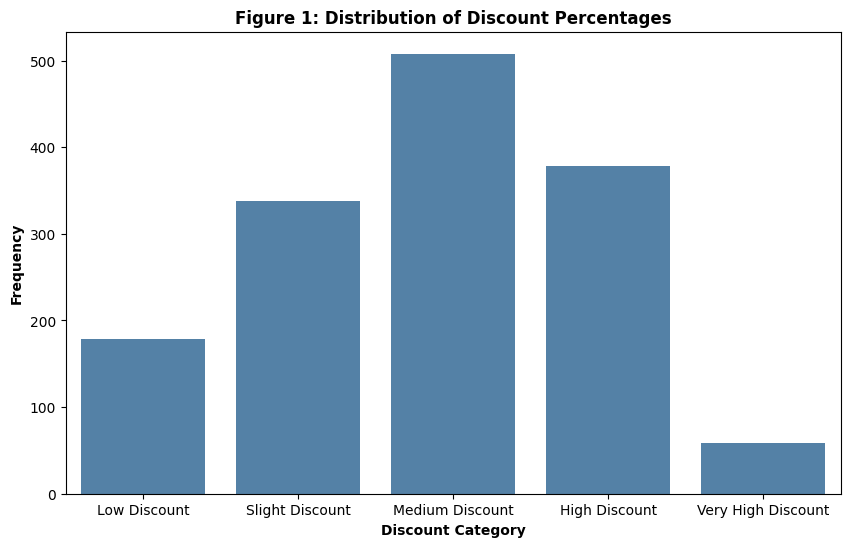

In [11]:
def discount_category(category):
    if 0 <= category <= 20:
      return 'Low Discount'
    elif category <= 40:
      return 'Slight Discount'
    elif category <= 60:
      return 'Medium Discount'
    elif category <= 80:
      return 'High Discount'
    elif category > 80:
      return 'Very High Discount'
    else:
      return 'Negative'

amazon['discount_category'] = amazon['discount_percentage'].apply(discount_category)

category_order = ['Low Discount','Slight Discount', 'Medium Discount', 'High Discount', 'Very High Discount']

plt.figure(figsize=(10, 6))
sns.countplot(data=amazon, x='discount_category', order=category_order,color = 'steelblue')
plt.xlabel('Discount Category', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Figure 1: Distribution of Discount Percentages', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

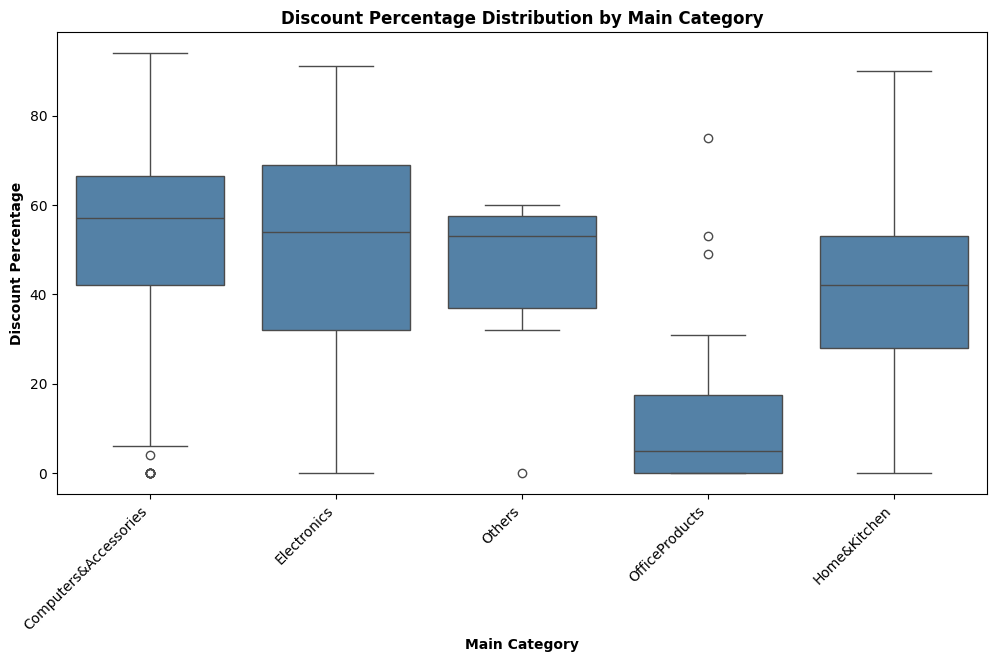

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='discount_percentage', data=amazon, color = 'steelblue')
plt.title('Discount Percentage Distribution by Main Category', fontweight='bold')
plt.xlabel('Main Category', fontweight='bold')
plt.ylabel('Discount Percentage', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

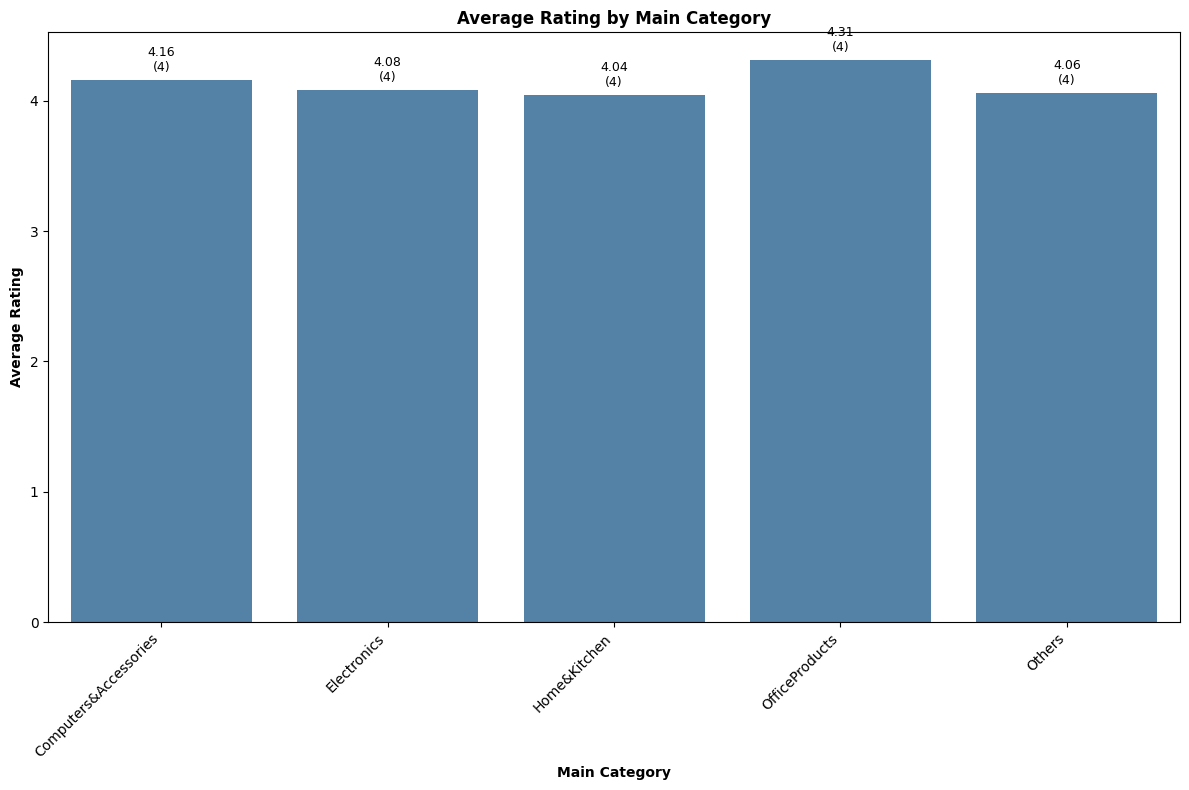

In [13]:
average_ratings = amazon.groupby('main_category')['rating'].mean()

plt.figure(figsize=(12, 8))
bars = sns.barplot(x=average_ratings.index, y=average_ratings.values, color='steelblue')
plt.xlabel('Main Category', fontweight='bold')
plt.ylabel('Average Rating', fontweight='bold')
plt.title('Average Rating by Main Category', fontweight='bold')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(average_ratings):
    bars.text(i, v + 0.05, f'{v:.2f}\n({average_ratings.iloc[i]:.0f})', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

<ipython-input-14-4e3829ff8c6a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='main_category', y='rating_count', data=amazon, color = 'steelblue', estimator=sum, ci=None)


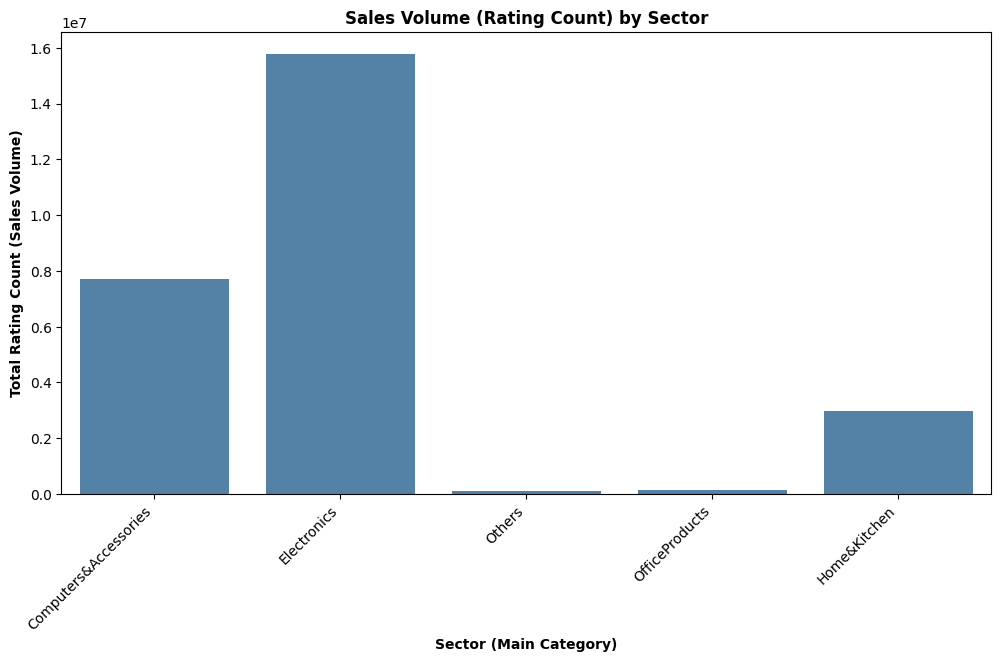

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='main_category', y='rating_count', data=amazon, color = 'steelblue', estimator=sum, ci=None)
plt.title('Sales Volume (Rating Count) by Sector', fontweight='bold')
plt.xlabel('Sector (Main Category)', fontweight='bold')
plt.ylabel('Total Rating Count (Sales Volume)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()


## 3.2: Correlation Between Ratings and Discounts.
### Why bigger discount don't alway lead to better ratings ?




In [15]:
formula_1 = 'rating ~ discount_percentage'
model_1 = smf.ols(formula_1, data=amazon).fit()
print(model_1.summary())

formula_2 = 'rating_count ~ discount_percentage'
model_2 = smf.ols(formula_2, data=amazon).fit()
print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           2.18e-09
Time:                        06:09:19   Log-Likelihood:                -243.74
No. Observations:                1462   AIC:                             491.5
Df Residuals:                    1460   BIC:                             502.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1961    

<ipython-input-16-0855e2c7e995>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation1 = f"y = {model1.params[1]:.4f}x + {model1.params[0]:.4f}\nR² = {model1.rsquared:.4f}"
<ipython-input-16-0855e2c7e995>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation2 = f"y = {model2.params[1]:.4f}x + {model2.params[0]:.4f}\nR² = {model2.rsquared:.4f}"


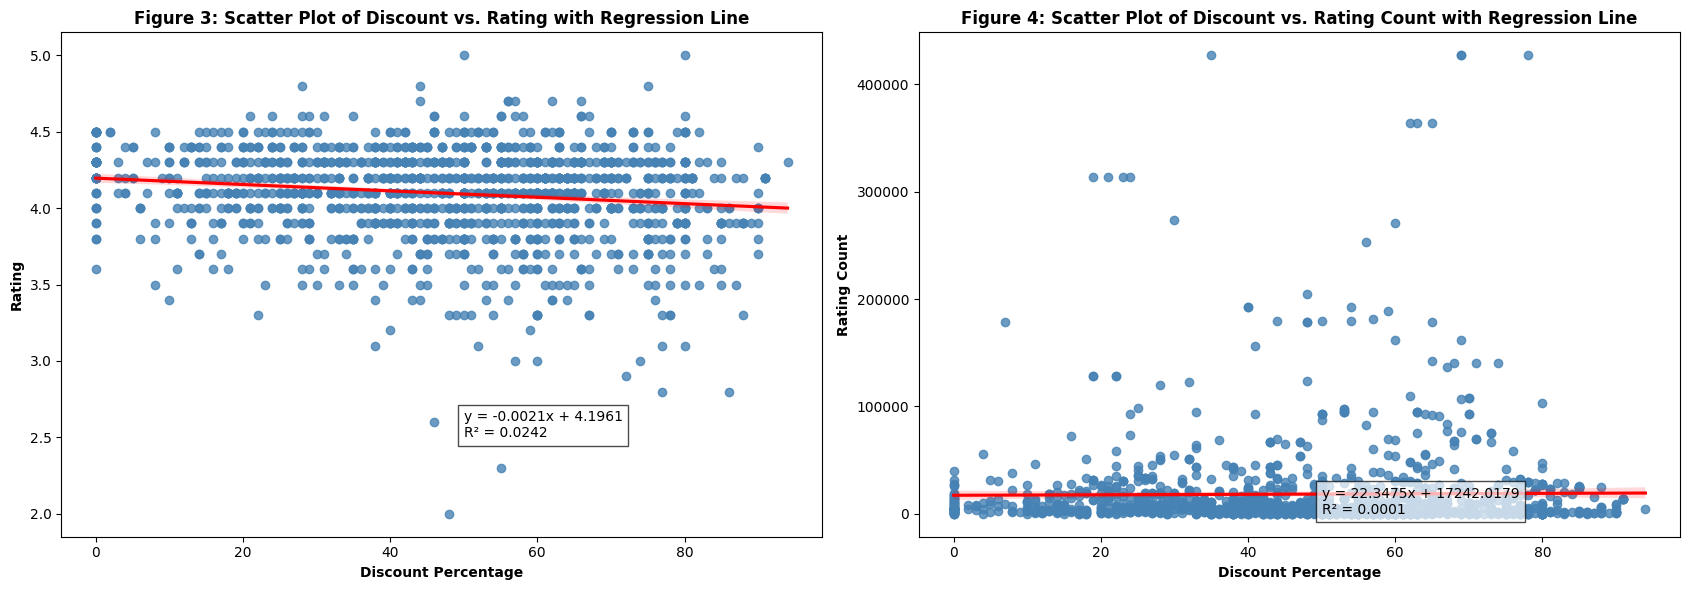

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(17, 6))

X1 = amazon['discount_percentage']
y1 = amazon['rating']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()

sns.regplot(x='discount_percentage', y='rating', data=amazon, ci=95,
            color='steelblue', line_kws={"color": "red"}, ax=axes[0])

axes[0].set_title("Figure 3: Scatter Plot of Discount vs. Rating with Regression Line", fontweight='bold')
axes[0].set_xlabel("Discount Percentage", fontweight='bold')
axes[0].set_ylabel("Rating", fontweight='bold')


equation1 = f"y = {model1.params[1]:.4f}x + {model1.params[0]:.4f}\nR² = {model1.rsquared:.4f}"
axes[0].text(50, 2.5, equation1, fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.7))

X2 = amazon['discount_percentage']
y2 = amazon['rating_count']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()

sns.regplot(x='discount_percentage', y='rating_count', data=amazon, ci=95,
            color='steelblue', line_kws={"color": "red"}, ax=axes[1])

axes[1].set_title("Figure 4: Scatter Plot of Discount vs. Rating Count with Regression Line", fontweight='bold')
axes[1].set_xlabel("Discount Percentage", fontweight='bold')
axes[1].set_ylabel("Rating Count", fontweight='bold')

equation2 = f"y = {model2.params[1]:.4f}x + {model2.params[0]:.4f}\nR² = {model2.rsquared:.4f}"
axes[1].text(50, 2.5, equation2, fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()



                     discount_percentage    rating  rating_count
discount_percentage             1.000000 -0.155679      0.011294
rating                         -0.155679  1.000000      0.102235
rating_count                    0.011294  0.102235      1.000000


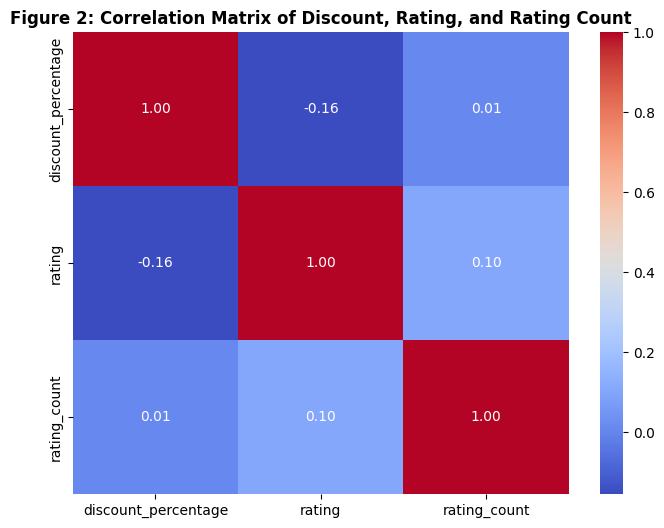

In [17]:
correlation_matrix = amazon[['discount_percentage', 'rating', 'rating_count']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 2: Correlation Matrix of Discount, Rating, and Rating Count', fontweight='bold')
plt.show()


### Key Data Insight:
No relationship between discount_percentage and rating_count



## Discount vs Sales volume and Rating




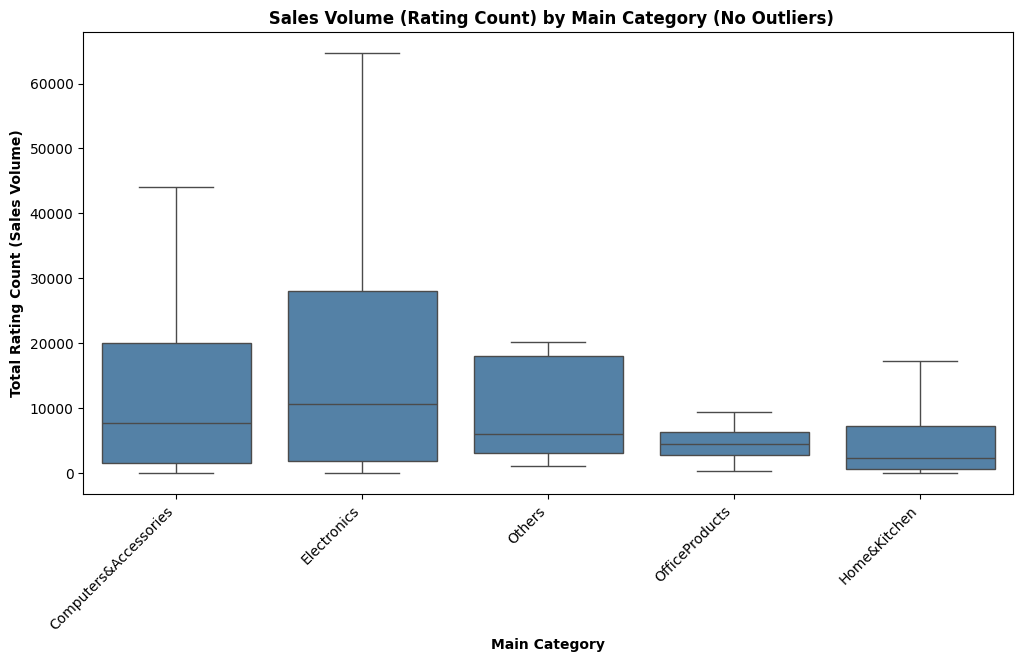

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='rating_count', data=amazon,color = 'steelblue',showfliers=False)
plt.title(' Sales Volume (Rating Count) by Main Category (No Outliers)', fontweight='bold')
plt.xlabel('Main Category', fontweight='bold')
plt.ylabel('Total Rating Count (Sales Volume)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()


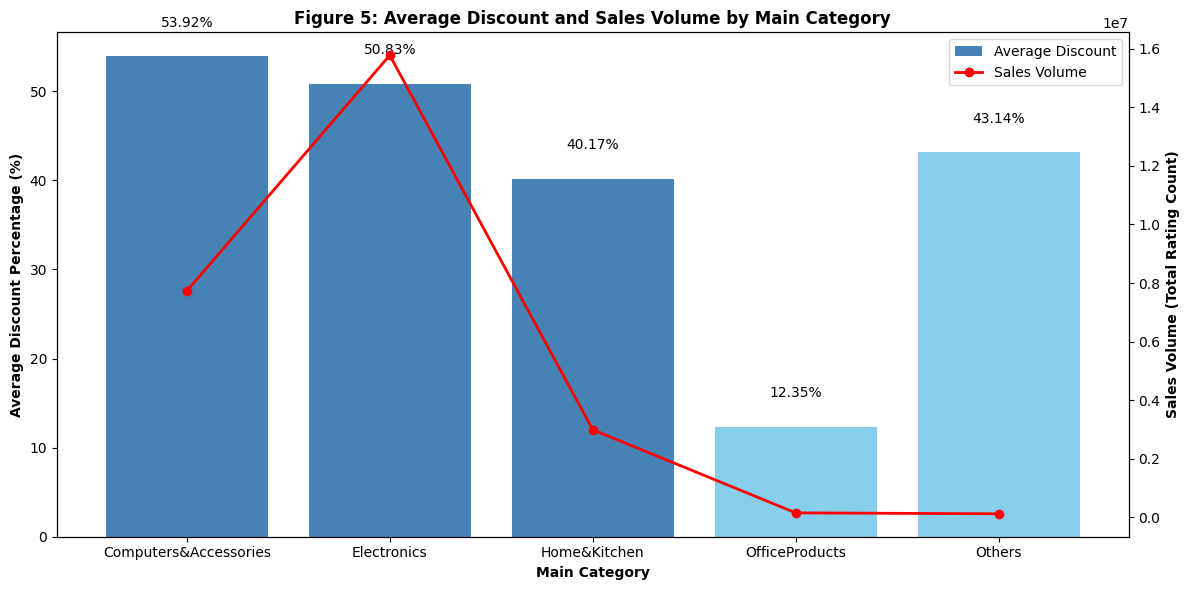

In [19]:
sales_volume = amazon.groupby('main_category')['rating_count'].sum()
average_discounts = amazon.groupby('main_category')['discount_percentage'].mean()
bar_colors = ['steelblue' if category not in ['OfficeProducts', 'Others'] else 'skyblue' for category in average_discounts.index]

fig, ax1 = plt.subplots(figsize=(12, 6))
bars = ax1.bar(average_discounts.index, average_discounts.values, color=bar_colors, label='Average Discount')
ax1.set_xlabel('Main Category', fontweight='bold')
ax1.set_ylabel('Average Discount Percentage (%)', fontweight='bold')
ax1.tick_params(axis='y')
ax1.set_title('Figure 5: Average Discount and Sales Volume by Main Category', fontweight='bold')


for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 3, f'{height:.2f}%', ha='center', va='bottom', color='black', fontsize=10)


ax2 = ax1.twinx()
ax2.plot(sales_volume.index, sales_volume.values, color='red', marker='o', linestyle='-', linewidth=2, label='Sales Volume')
ax2.set_ylabel('Sales Volume (Total Rating Count)', fontweight='bold')
ax2.tick_params(axis='y')


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()


In [20]:
amazon['discount_percentage'].describe()

,discount_percentage
count,1462.000000
mean,47.672367
std,21.613905
min,0.000000
25%,32.000000
50%,50.000000
75%,63.000000
max,94.000000


### Key data insight:

*   OfficePoducts have low sales volumns and low discount showing customer is not attract
*  About Others, discount seem no effective in this category as it have fairly high discount but the sales volume is very low. main reason, low diversify of products



In [ ]:
top_10_subcategories = amazon.groupby('sub_category').agg({
    'rating': 'mean', 'rating_count': 'sum', 'main_category': 'first'}).sort_values('rating_count').head(10)


category_colors = {
    'Electronics': 'skyblue',
    'Computers&Accessories': 'steelblue',
    'Home&Kitchen': 'royalblue',
    'OfficeProducts': 'slateblue',
}


bar_colors = [category_colors.get(top_10_subcategories.loc[sub, 'main_category'], 'gray') for sub in top_10_subcategories.index]


plt.figure(figsize=(12, 6))
plt.xlabel("Sub-Category", fontweight='bold')
plt.ylabel("Total Rating Count (Sales Volume)", fontweight='bold')
plt.title("Figure 6: Top 10 Sub-Categories with Lowest Sales Volume", fontweight='bold')
plt.xticks(rotation=45, ha='right')


for i, sub_cat in enumerate(top_10_subcategories.index):
    discount = amazon[amazon['sub_category'] == sub_cat]['discount_percentage'].mean()
    main_cat = top_10_subcategories.loc[sub_cat, 'main_category']
    plt.text(i, top_10_subcategories['rating_count'].iloc[i] * 1.05, f'{discount:.1f}%\n({main_cat})',
             ha='center', fontsize=9, color='black')


import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=category) for category, color in category_colors.items()]
plt.legend(handles=legend_patches, title="Main Category")

plt.tight_layout()
plt.show()



<ipython-input-21-b246f19ff3f2>:34: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


In [ ]:

average_discounts = amazon.groupby('main_category')['discount_percentage'].mean()
average_ratings = amazon.groupby('main_category')['rating'].mean()
bar_colors = ['skyblue' if 'OfficeProducts' in category else 'steelblue' for category in average_discounts.index]

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.bar(average_discounts.index, average_discounts.values, color = bar_colors, label='Average Discount Percentage')
ax1.set_xlabel("Main Category", fontweight='bold')
ax1.set_ylabel("Average Discount Percentage", fontweight='bold')
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
line = ax2.plot(average_ratings.index, average_ratings.values, color='red', marker='o', linestyle='-', linewidth=2, label='Average Rating')
ax2.set_ylabel("Average Rating", fontweight='bold')
ax2.tick_params(axis='y')


for i, txt in enumerate(average_ratings.values):
    ax2.annotate(f"{txt:.2f}",
                 xy=(i, txt),
                 xytext=(0, 10),
                 textcoords="offset points",
                 ha='center', fontsize=10, color='black')


plt.title("Figure 7: Average Discount Percentage and Average Rating by Main Category", fontweight='bold')
plt.xticks(rotation=45, ha="right")


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
amazon['rating'].describe()

In [ ]:
filter  = amazon['rating'] < 4
amazon[filter].count()

In [ ]:

filter = amazon[amazon['rating'] < 4]

top_20_products = filter.groupby('sub_category')['discount_percentage'].mean().nlargest(20)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=top_20_products.index, y=top_20_products.values, palette="Blues_d")
plt.xlabel("Product Sub-Category", fontweight='bold')
plt.ylabel("Average Discount Percentage", fontweight='bold')
plt.title("Figure 8: Top 20 Products (Sub-Category) with Rating < 4 and their Discount Percentage", fontweight='bold')
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
              f"{bar.get_height():.2f}%", ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()


### High ticket items


In [ ]:
expensive_items = amazon['actual_price'] > 10000
expensive_items = amazon[expensive_items]
expensive_items.describe

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(expensive_items['discount_percentage'], bins=20)
plt.xlabel('Discount Percentage', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Discount Percentages for Expensive Items', fontweight='bold')
plt.show()


In [ ]:

sales_volume = expensive_items.groupby('main_category')['rating_count'].sum()
average_discounts = expensive_items.groupby('main_category')['discount_percentage'].mean()


sales_volume = sales_volume.sort_values(ascending=False)
average_discounts = average_discounts.loc[sales_volume.index]


fig, ax1 = plt.subplots(figsize=(14, 6))

colors = ['skyblue' if category == 'Electronics' else 'steelblue' for category in sales_volume.index]

bars = ax1.bar(sales_volume.index, sales_volume.values, color=colors, label='Sales Volume')

ax1.set_xlabel("Main Category", fontweight='bold')
ax1.set_ylabel("Sales Volume (Total Rating Count)", fontweight='bold')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(average_discounts.index, average_discounts.values, color='red', marker='o', linestyle='-', label='Average Discount')
ax2.set_ylabel("Average Discount Percentage (%)", fontweight='bold')
ax2.tick_params(axis='y')


for i, txt in enumerate(average_discounts.values):
    ax2.annotate(f"{txt:.2f}",
                 xy=(i, txt),
                 xytext=(0, 10),
                 textcoords="offset points",
                 ha='center', fontsize=10, color='black')

plt.title("Figure 9: Sales Volume and Average Discount of Expensive Items by Main Category",fontweight = 'bold')
plt.xticks(rotation=45, ha="right")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()


### Data insight: Electronic have the highest  sale volume but it offer the lowest discount. So company can offer more discount for product in this category as it expensive


In [ ]:
import nltk
print(nltk.data.path)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re



# Convert necessary columns to strings to avoid NaN issues
amazon['review_title'] = amazon['review_title'].fillna('').astype(str)
amazon['review_content'] = amazon['review_content'].fillna('').astype(str)

# Ensure ratings are numeric for filtering
amazon['rating'] = pd.to_numeric(amazon['rating'], errors='coerce')

# Filter low-rated products (rating < 3)
low_rated_df = amazon[amazon['rating'] < 3.0].copy()

# Combine review_title and review_content
low_rated_df['combined_review'] = low_rated_df['review_title'] + ' ' + low_rated_df['review_content']

# Define text preprocessing function without NLTK
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\W+', ' ', text)  # Remove punctuation and special characters
        text = re.sub(r'\d+', '', text)  # Remove numbers
        words = text.split()  # Tokenization (split by space)
        return ' '.join(words)
    return ''

# Apply preprocessing to reviews
low_rated_df['processed_review'] = low_rated_df['combined_review'].apply(preprocess_text)

# Perform Word Frequency Analysis (Unigrams)
vectorizer = CountVectorizer(max_features=50)  # Adjust max_features as needed
word_counts = vectorizer.fit_transform(low_rated_df['processed_review'])
word_list = vectorizer.get_feature_names_out()
word_frequency = word_counts.toarray().sum(axis=0)

# Create DataFrame for word frequency
word_freq_df = pd.DataFrame({'word': word_list, 'frequency': word_frequency})
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

#  Perform N-gram Analysis (Bigrams)
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50)  # Extract only bigrams
bigram_counts = bigram_vectorizer.fit_transform(low_rated_df['processed_review'])
bigram_list = bigram_vectorizer.get_feature_names_out()
bigram_frequency = bigram_counts.toarray().sum(axis=0)

# Create a DataFrame for bigram frequency
bigram_freq_df = pd.DataFrame({'bigram': bigram_list, 'frequency': bigram_frequency})
bigram_freq_df = bigram_freq_df.sort_values('frequency', ascending=False)

bigram_freq_df







In [ ]:
plt.figure(figsize=(9, 9))
top_10_bigrams = bigram_freq_df.head(20)
sns.barplot(x='frequency', y='bigram', data=top_10_bigrams, palette="Blues_d")
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Bigram', fontweight='bold')
plt.title('Figure 10: Top 20 Bigrams in Low-Rated Reviews', fontweight='bold')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


# Combine 'review_title' and 'review_content' into a single column
amazon['combined_review'] = amazon['review_title'].fillna('') + " " + amazon['review_content'].fillna('')

# Define a custom list of stopwords (avoiding NLTK dependency)
custom_stopwords = set([
    "a", "an", "the", "and", "or", "but", "if", "then", "because", "as", "until", "while",
    "of", "at", "by", "for", "with", "about", "against", "between", "into", "through",
    "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out",
    "on", "off", "over", "under", "again", "further", "then", "once", "here", "there",
    "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most",
    "other", "some", "such", "only", "own", "same", "so", "than", "too", "very", "s", "t",
    "can", "will", "just", "don", "should", "now"
])

# Tokenize and clean the combined reviews
all_text = " ".join(amazon['combined_review']).lower()  # Convert to lowercase
words = re.findall(r'\b\w+\b', all_text)  # Extract words
filtered_words = [word for word in words if word not in custom_stopwords]  # Remove stopwords

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Common Words in Reviews", fontsize=14, fontweight='bold')
plt.show()





## 4. Key Insights & Recommendations

- Summarize findings and provide actionable recommendations for Amazon’s discount strategies.
- Suggest improvements based on data-driven conclusions.
- Highlight potential optimizations for pricing and marketing strategies.
